In [51]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
plt.rcParams['axes.facecolor'] = '#FFCCCB'

link = "https://www.eu-startups.com/directory"
html = requests.get(link).text
soup = BeautifulSoup(html)
extracted = soup.find("div", id="wpbdp-categories")

lists = extracted.find_all("li")
countries = [l.text.strip().split() for l in lists if l != None]
countries = [[k, int(v[1:-1])]for k,v in countries]
countries = dict(countries)
countries = dict(sorted(countries.items()))

def viz(startup_index, top=40, step=30):
    plt.yticks(np.arange(0, 15, step=1))
    # values -> werte
    # landern -> countries
    labels = list(startup_index.keys())
    values = list(startup_index.values())

    values = np.array(values)
    labels = np.array(labels)
    idx = np.argsort(values)
    labels = labels[idx]
    values = values[idx]

    plt.bar(labels, values)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Histogram of Data')
    plt.xticks(rotation = 80)
    plt.grid(True)
    plt.show()

In [47]:
population_by_country = {
    'Austria': 9006400,
    'Belgium': 11589600,
    'Bulgaria': 6934900,
    'Croatia': 4105300,
    'Cyprus': 1207300,
    'Czechia': 10708900,
    'Denmark': 5831400,
    'Estonia': 1331000,
    'Finland': 5540700,
    'France': 67391600,
    'Germany': 83783900,
    'Greece': 10423100,
    'Hungary': 9660300,
    'Ireland': 5026600,
    'Italy': 59554000,
    'Latvia': 1901500,
    'Lithuania': 2794700,
    'Luxembourg': 632300,
    'Malta': 516100,
    'Netherlands': 17441200,
    'Norway': 5421200,
    'Poland': 37846600,
    'Portugal': 10196700,
    'Romania': 19237700,
    'Slovakia': 5459600,
    'Slovenia': 2100100,
    'Spain': 47351600,
    'Sweden': 10452300,
    'Switzerland': 8654600,
    'UK': 67215300
}

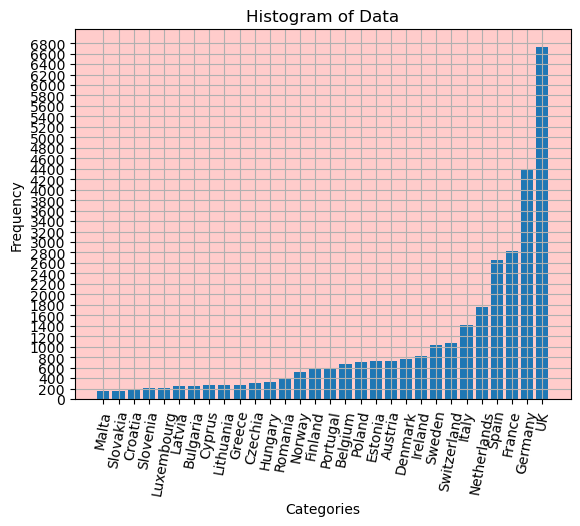

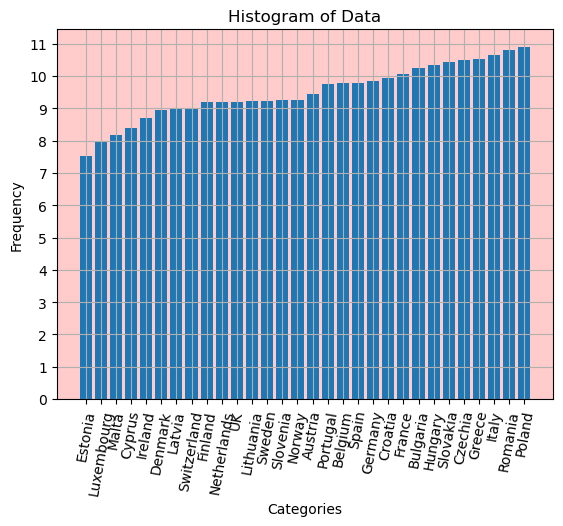

In [50]:
plt.yticks(np.arange(0, 7000, step=200))
labels = list(countries.keys())
values = list(countries.values())

values = np.array(values)
labels = np.array(labels)
idx = np.argsort(values)
labels = labels[idx]
values = values[idx]

plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.xticks(rotation = 80)
plt.grid(True)
plt.show()

startup_index = {k:-np.log(countries[k]/population_by_country[k]) for k in population_by_country.keys()}
viz(startup_index, top=12, step=1)